In [1]:
from ema_workbench.analysis import parcoords
import pandas as pd
from ema_workbench import load_results
import seaborn as sns
import os
from model.enums import BeliefUpdate
from dmdu.utils_dmdu import get_lever_names, get_outcome_names

sns.set(rc={'figure.figsize': (14, 10)})

### Loading the data (results)

#### TODOs:
- make a function 'load_my_csv(nfe, bufn, filename, seed=None)' make it also remove the "Unnamed: 0" col and rescale (below 2 cells)
- create data dict {DEFFUANT: deffuant_data, ...}



In [2]:
# Params  # TODO: make a function 'load_my_csv(nfe, bufn, filename, seed=None)' make it also remove the "Unnamed: 0" col
nfe = 50000
bufn = BeliefUpdate.DEFFUANT

# Loading the results
results_path = os.path.join(os.getcwd(), "data", f"{nfe}_nfe", bufn.name, "results.csv")
results = pd.read_csv(results_path)

# Dropping unwanted column
results = results.rename(columns={"Unnamed: 0": "policy"})
results

,policy,mlit_select,del_t,rank_punish,rank_t,strikes_t,n_agents_above_belief_threshold,polarization_variance,engagement,free_speech_constraint,avg_user_effort
0,0,8,3,10,2,4,934.266667,148.520333,5.001667,166.050600,0.228186
1,1,0,3,4,0,1,752.366667,286.650000,4.770667,135.703033,0.124416
2,2,1,2,3,2,4,933.733333,144.577667,5.002667,166.150133,0.206379
3,3,5,5,2,3,4,940.333333,140.553333,5.053333,169.451467,0.212743
4,4,3,3,7,2,5,936.433333,145.995000,5.067000,166.399500,0.239598
...,...,...,...,...,...,...,...,...,...,...,...
82,82,2,5,2,0,5,905.033333,179.936667,4.970333,152.657467,0.261551
83,83,3,1,0,1,1,742.333333,294.585667,4.745333,134.033267,0.129587
84,84,7,2,5,4,2,929.666667,143.100000,5.047667,165.780500,0.155172
85,85,5,1,3,5,3,945.466667,133.642667,5.064000,171.735800,0.182504


In [3]:
# rescale lever values (0-10 -> 0-100, 0-5 -> 0-50)
lever_names = get_lever_names()
for col_name in results.columns:
    if col_name in lever_names:
        results[col_name] *= 10

results

,policy,mlit_select,del_t,rank_punish,rank_t,strikes_t,n_agents_above_belief_threshold,polarization_variance,engagement,free_speech_constraint,avg_user_effort
0,0,80,30,100,20,40,934.266667,148.520333,5.001667,166.050600,0.228186
1,1,0,30,40,0,10,752.366667,286.650000,4.770667,135.703033,0.124416
2,2,10,20,30,20,40,933.733333,144.577667,5.002667,166.150133,0.206379
3,3,50,50,20,30,40,940.333333,140.553333,5.053333,169.451467,0.212743
4,4,30,30,70,20,50,936.433333,145.995000,5.067000,166.399500,0.239598
...,...,...,...,...,...,...,...,...,...,...,...
82,82,20,50,20,0,50,905.033333,179.936667,4.970333,152.657467,0.261551
83,83,30,10,0,10,10,742.333333,294.585667,4.745333,134.033267,0.129587
84,84,70,20,50,40,20,929.666667,143.100000,5.047667,165.780500,0.155172
85,85,50,10,30,50,30,945.466667,133.642667,5.064000,171.735800,0.182504


In [4]:
data_dict = {BeliefUpdate.DEFFUANT.name: results}

### Assigning each model a color
(This is for when data from multiple models is available.)

In [5]:
model_names = [x.name for x in list(BeliefUpdate)]

# Assign each unique model a color
model_colors = {}

for _, (model, color) in enumerate(zip(model_names, sns.color_palette("colorblind"))):
    model_colors[model] = color

for k, v in model_colors.items():
    print(k,v)


SAMPLE (0.00392156862745098, 0.45098039215686275, 0.6980392156862745)
DEFFUANT (0.8705882352941177, 0.5607843137254902, 0.0196078431372549)
SIT (0.00784313725490196, 0.6196078431372549, 0.45098039215686275)


In [6]:
# TODO: Set limits to be comparable across Belief Update functions
#  - After load_my_csv() is written
#  - After results for different Bufns are available

In [7]:
lever_data = results[get_lever_names()]
lever_data


,mlit_select,del_t,rank_punish,rank_t,strikes_t
0,80,30,100,20,40
1,0,30,40,0,10
2,10,20,30,20,40
3,50,50,20,30,40
4,30,30,70,20,50
...,...,...,...,...,...
82,20,50,20,0,50
83,30,10,0,10,10
84,70,20,50,40,20
85,50,10,30,50,30


# Combined Parallel Axis Plot

Index(['policy', 'mlit_select', 'del_t', 'rank_punish', 'rank_t', 'strikes_t',
       'n_agents_above_belief_threshold', 'polarization_variance',
       'engagement', 'free_speech_constraint', 'avg_user_effort'],
      dtype='object')


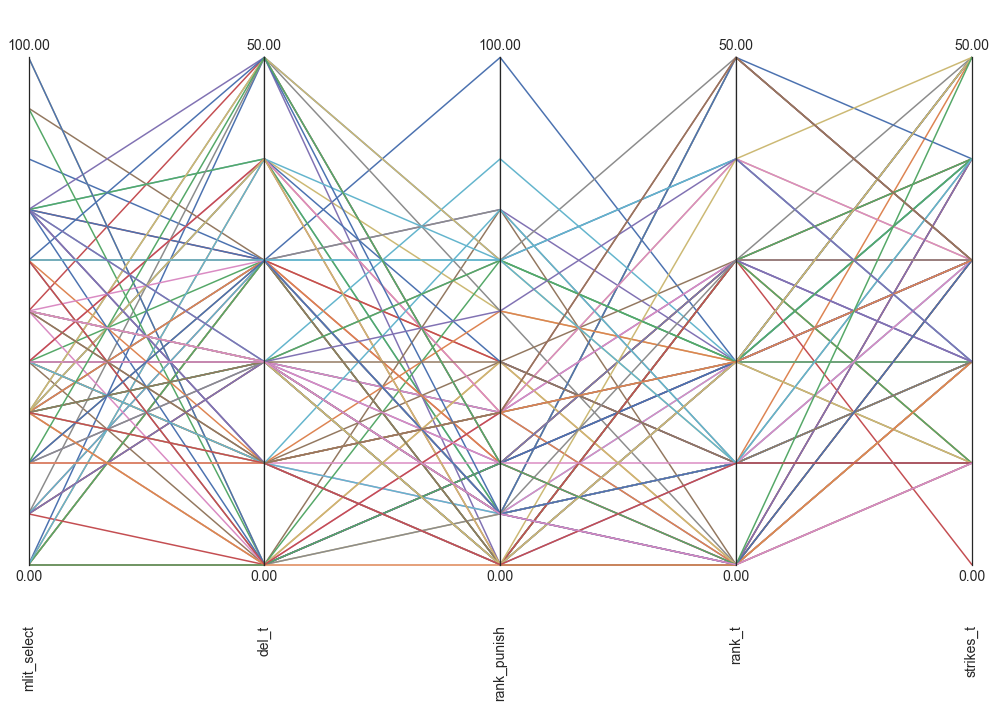

In [8]:
print(results.columns)


# lever limits: constraint like in get_levers()
# limits = {'policy': [0, 86],
#           'mlit_select': [0, 10],
#           'del_t': [0, 5],
#           'rank_punish': [0, 10],
#           'rank_t': [0, 5],
#           'strikes_t': [0, 5]
#           }
# lever limits: broadest
# limits = {'policy': [0, 86],
#           'mlit_select': [0, 100],
#           'del_t': [0, 100],
#           'rank_punish': [0, 100],
#           'rank_t': [0, 100],
#           'strikes_t': [0, 100]
#           }


# Levers
lever_data = results[get_lever_names()]
limits = parcoords.get_limits(lever_data)
axes = parcoords.ParallelAxes(limits)

for model_name, data in data_dict.items():
    color = model_colors[model_name]

    # subset data
    lever_data = data[get_lever_names()]
    axes.plot(lever_data)  #, color=color)

# axes.legend()

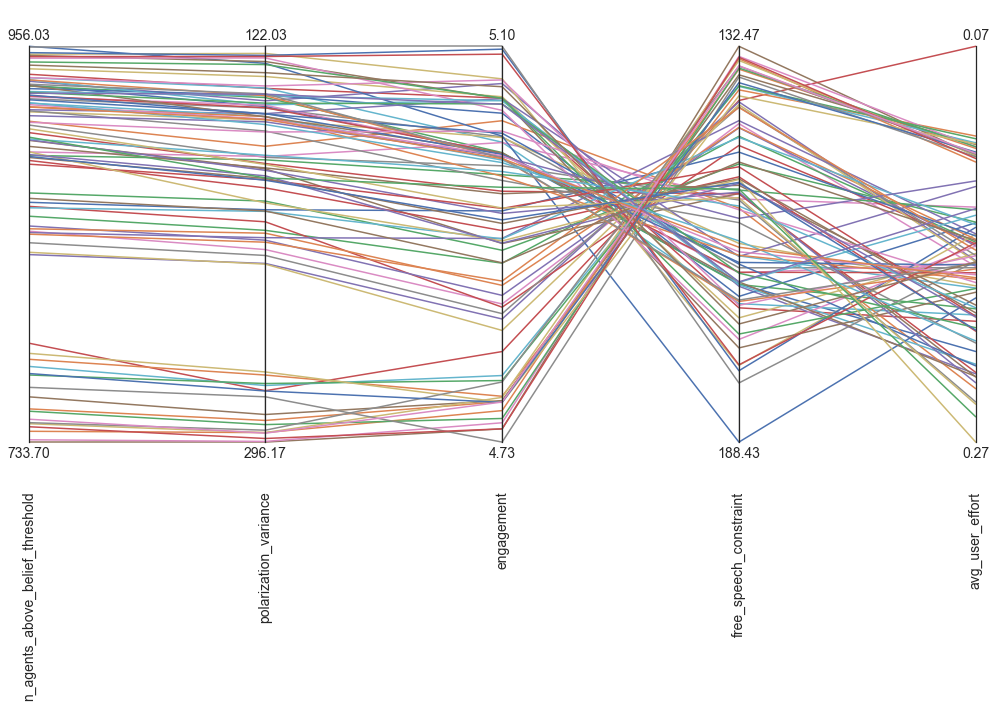

In [16]:

# Outcomes
outcomes_data = results[get_outcome_names()]
limits = parcoords.get_limits(outcomes_data)
axes = parcoords.ParallelAxes(limits)

# Inverting axes (minimized metrics)
minimize = ['polarization_variance', 'free_speech_constraint', 'avg_user_effort']
for metric in minimize:
    axes.invert_axis(metric)

for model_name, data in data_dict.items():
    color = model_colors[model_name]

    # subset data
    outcomes_data = data[get_outcome_names()]
    axes.plot(outcomes_data)  #, color=color)


# axes.legend()

# Take-Aways:
- lever values span the whole ranges (just seem restricted bc re-mapping(*10) and only exploring those values)
- could be useful to have the interactive plot instead (e.g., shift axes around to see how e.g. del_t highest value maps to metrics (similar to how it's visible for strikes_t right now)
- strong invers relationship between engagement & free_speech_constraint

In [ ]:
# old. don't need anymore:

# # Comparing with Open Exploration data (DEFFUANT)
# - Use limits from combined set (exploration results + optimization results)
# - check whether the lever-values were also so restricted in exploration


# #### Loading exploration data
# dmdu_dir_path = os.path.dirname(os.getcwd())
# path = os.path.join(dmdu_dir_path, 'exploration', 'data', 'open_exploration_50_policies_DEFFUANT')
# explore_results = load_results(path)
# exp, out = explore_results
# exp

# exp["seed"].value_counts()  # weird values, but each is 50x -> ok!

# #### Combine exploration data & testrun results
# exp = exp.drop(columns=["model", "scenario", "policy"]) # not needed and causing errors to get max value (bc categorical from workbench)
# exp



In [13]:
#

In [14]:
def fill_limits_data(df, limits_data):
    print(type(df))
    for col_name in df.columns:
        min_val = df[col_name].min()
        max_val = df[col_name].max()

        if col_name not in limits_data.keys():
            limits_data[col_name] = [[min_val, max_val]]
        else:
            limits_data[col_name] += [[min_val, max_val]]





limits_data = {}

dfs = [exp, pd.DataFrame(out), results]

for df in dfs:
    fill_limits_data(df, limits_data)

for k, v in limits_data.items():
    print(k,v)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
belief_metric_threshold [[75, 80]]
deffuant_mu [[0.0102609853956199, 0.0299153900080677]]
high_media_lit [[0.2505150658800705, 0.3493865436971447]]
mean_disinformer [[8, 12]]
mean_normal_user [[0, 2]]
n_edges [[2, 3]]
n_posts_estimate_similarity [[5, 15]]
ratio_normal_user [[0.9800962493766082, 0.9949298752544918]]
sampling_p_update [[0.010390686835417, 0.0298876628969581]]
seed [[18441.48359074693, 986932.8361420772]]
del_t [[0, 5], [0, 50]]
mlit_select [[0, 10], [0, 100]]
rank_punish [[0, 10], [0, 100]]
rank_t [[0, 5], [0, 50]]
strikes_t [[0, 5], [0, 50]]
n_agents_above_belief_threshold [[246, 998], [733.7, 956.0333333333332]]
polarization_variance [[14.09, 553.53], [122.02566666666668, 296.1746666666667]]
engagement [[94279, 874322], [4.7330000000000005, 5.101666666666666]]
free_speech_constraint [[0.0087830366902338, 0.4469117950836604], [132.47220000000002, 188.4347666

# TODO: APPARENTLY THE UNITS CHANGED:
- ENGAGEMENT: TOTAL -> PER AGENT, BUT MORE DIFFERENT. HOW?
- FREE_SPEECH_CONSTRAINT: N_POSTS_"DELETED" -> PERCENTAGE OF POSTS "DELETED"?
- AVG_USER_EFFORT: ?